# Object-Oriented Preceptron API

In [1]:
import numpy as np

## Creating Perceptron classifier (for Binary classification)

### Overall Parameters and Attributes

#### Parameters

- eta: float
    - Learning rate (between 0.0 and 1.0)
- n_iter: int
    - Passes over the training dataset. (a.k.a epochs)
- random_state: int
    - Random number generator seed for random weight initialization.

#### Attributes

- w_: 1d-array
    - Weights after fitting.
- errors_: list
    - Number of misclassifications (updates) in each epoch.

### Fit method

#### Parameters

- X: Training vectors, where n_examples is the number of examples and n_features is the number of features.
    - {array-like}
    - shape = [n_examples, n_features]
- y: Target values.
    - array-like
    - shape = n_examples

#### Returns

- self: object


In [32]:
class Preceptron(object):

    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(
            loc = 0.0,
            scale = 0.01,
            size = 1 + X.shape[1]
        )
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update               #This is the theta, or bias unit (a.k.a. threshold)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        # Calculates net input
        return np.dot(X, self.w_[1:] + self.w_[0])

    def predict(self, X):
        # Returns class label after unit step
        return np.where(self.net_input(X) >= 0.0, 1, -1)

        

## Importing the Iris dataset directly from the UCI Machine Learning Repository

In [5]:
import os
import pandas as pd 
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
print('URL:', s)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [22]:
df = pd.read_csv(
    s,
    header= None,
    encoding= 'utf-8'
)

print(df.head())
print(df.iloc[49,4],df.iloc[99,4]) #Checking values are separated

0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
Iris-setosa Iris-versicolor


In [12]:
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Extracting and Graphing Labels

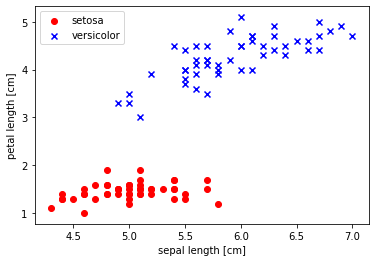

In [25]:
import matplotlib.pyplot as plt
import numpy as numpy

# Selecting Setosa and Versicolor labels
y = df.iloc[0:100, 4].values
y = np.where(y == 'Irish-setosa', -1, 1)

# Extract sepal lenfth and petal length
X = df.iloc[0:100, [0,2]].values #We are only using two features to simplify graphing (this is just practice)

# Plotting data
plt.scatter(
    X[:50, 0],
    X[:50, 1],
    color= 'red',
    marker= 'o',
    label= 'setosa'
)

plt.scatter(
    X[50:100, 0],
    X[50:100, 1],
    color= 'blue',
    marker= 'x',
    label= 'versicolor'
)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc= 'upper left')
plt.show()

### IMPORTANT NOTE

Please note that in this dataset (and specifically, in this two-dimensional feature subsapce), a linear decision boundary is sufficient to sepearte the two types of flowers we chose to use in this classifier. This makes our perceptron capable of being used since it's a linear classifier.

## Training Perceptron and Graphing Errors

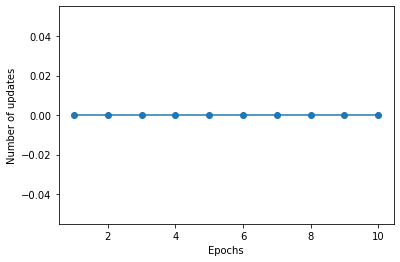

In [34]:
# Creating model
ppn = Preceptron(eta = 0.1, n_iter = 10)

# Fitting model
ppn.fit(X, y)

# Plotting erros
plt.plot(
    range(1, len(ppn.errors_) + 1),
    ppn.errors_,
    marker= 'o'
)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [29]:
print(X.shape)

(100, 2)
